# Tuesday: Gradients

Gradient calculations are done to find the optimal parameters / weights for neurons in a network. Finding these gradients is computionally difficult. Below we calculate the gradient using the partial derivative.

Note as we have distinct terms $w_1$ and $w_2$ we have two separate derivative functions for each. 
$$L(w) = w_1^2 + w_2^2 - w_1w_2\\
L'(w) = \frac{\partial L(w)}{\partial(w)} = 2w_1 - w_2 + (2w_2 - w_1)\\
$$
Calculating both the gradients for $w_1$ and $w_2$
$$
A = (-5, 5) \\
w_1 = 2 * -5 - 5 = -15, w_2 = 2*5 -- 5= [-15, 15]\\
$$

In [21]:
import torch
w = torch.tensor([-5.0, 5.0], dtype=torch.float32, requires_grad=True)

a = 1
L = w[0] **2 + w[1]**2 - w[0]*w[1]

L.backward()
print(L)
print(w.grad)

tensor(75., grad_fn=<SubBackward0>)
tensor([-15.,  15.])


**Automatic differentiation**

* build a computational graph of element operations 
* you can combine the derivatives using the chain rule 
* calculate the gradient with respect to every parameter in the model

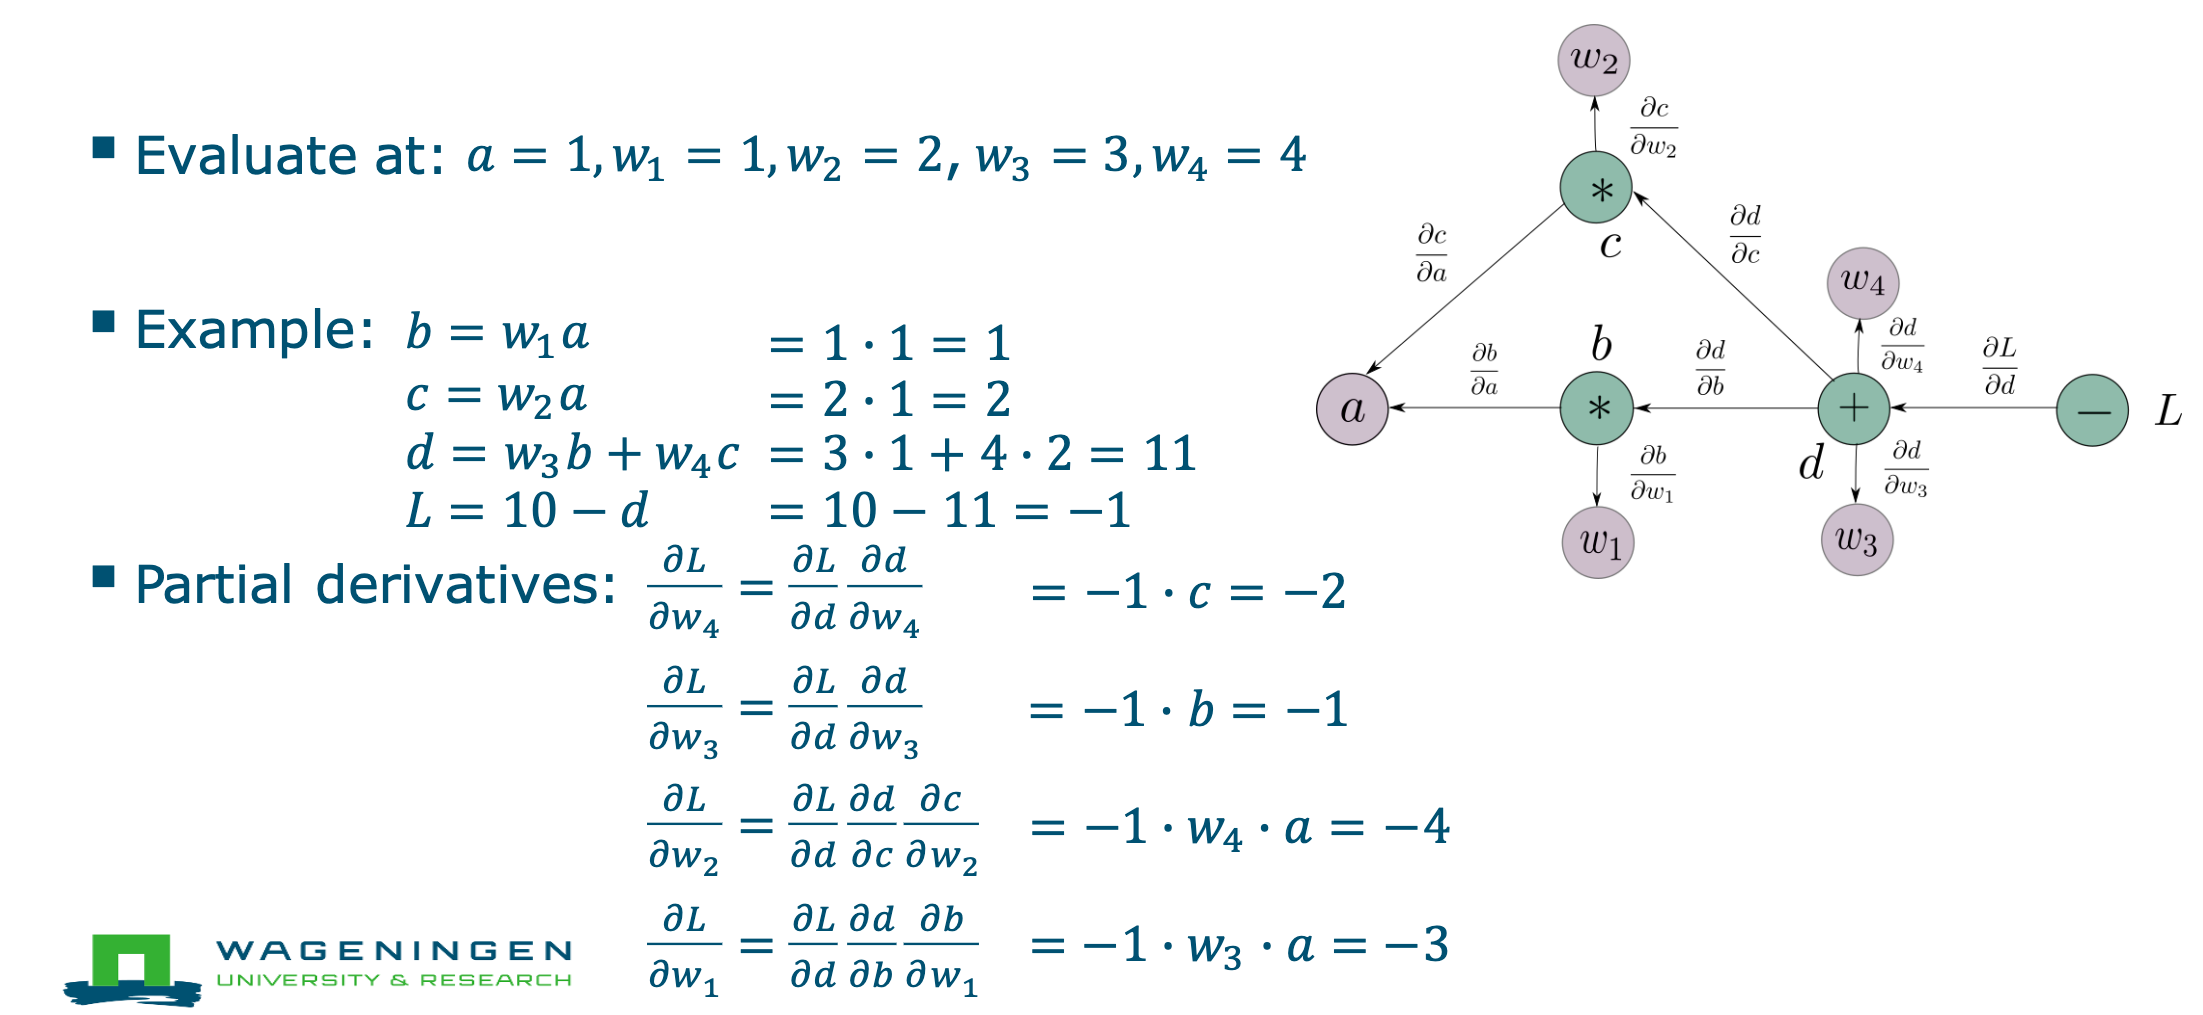

Gradient descent optimization is very difficult when problems involve lots of features. In general we find maxima and minima using differentiation we always look for where the derivative is zero.

* Calculate the derivative and go in downward direction (-)
* Calculate the derivative and go in upward direction (+)


**batch gradient descent**

minimize the loss function using stochastic gradient descent:

* start from random weights
* for a number of epochs(run through the whole training set) r:
    * for each sample i:
        * calculate gradients for each sample i 
        * update parameters 

this is computationally very taxing so we batch the sample into batches B i.e. i=B. We do multiple epochs to train the model.

**Learning rate**

The learning rate controls the step at which the computer walks through the graph, the step is key as it may decide wether you ever find the optimal minima. Momentum terms are sometimes added to the step function to release from endlessly looping over minima.

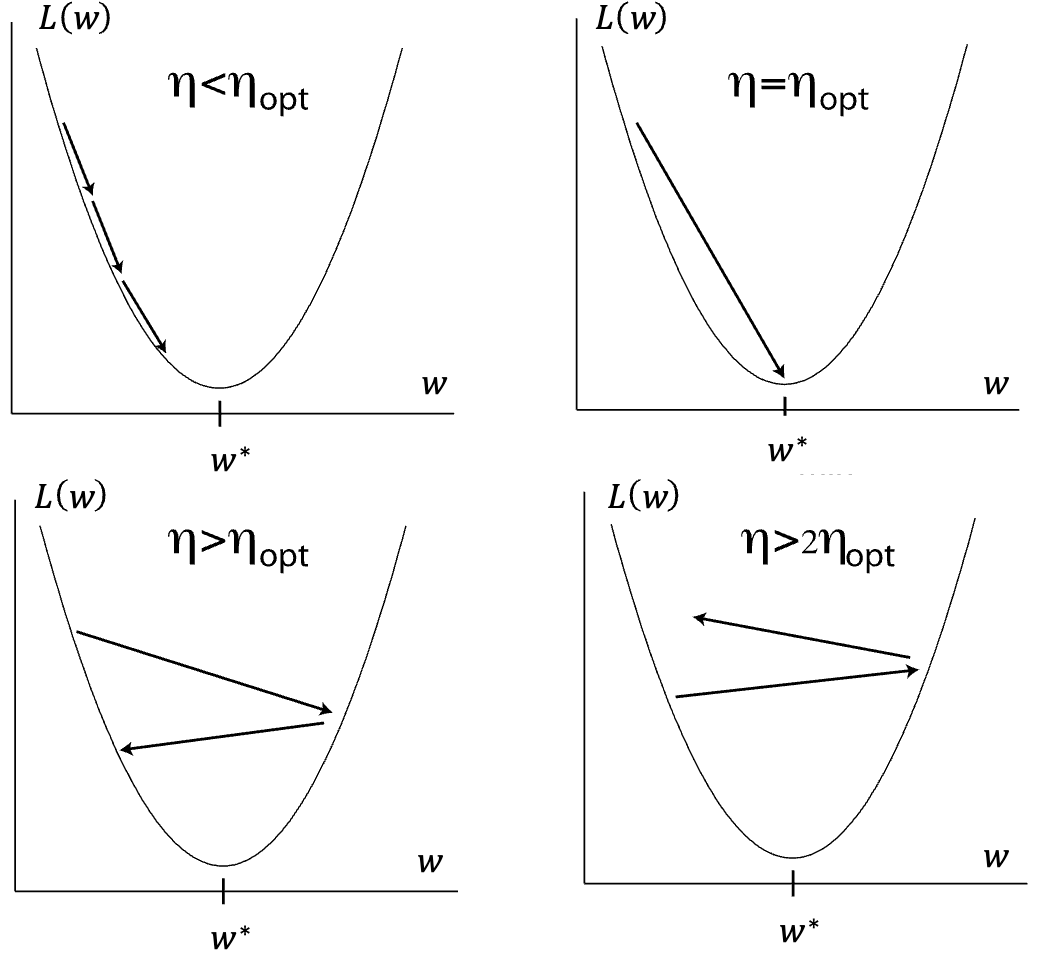

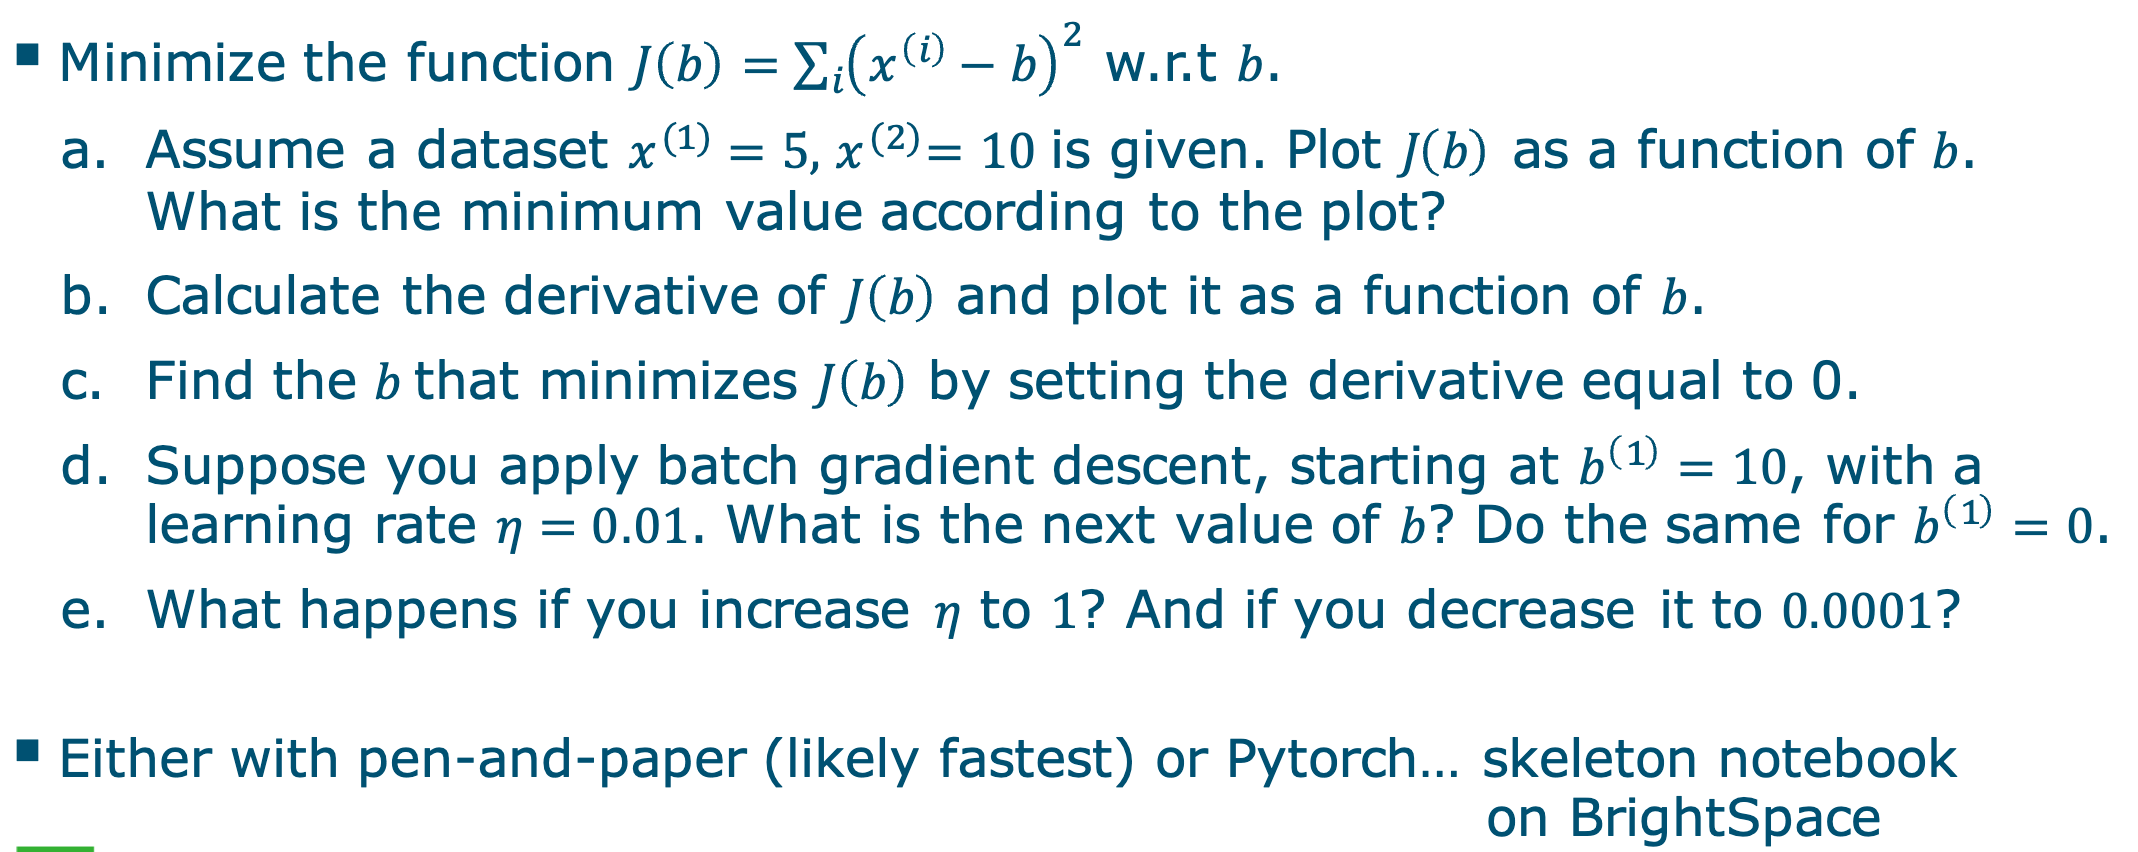

The graph of j(b) as a function of b given x1 = 5 and x2=10


$$\Large J(b, x_1=5, x_2=10) = (5 - b)^2 + (10 -b)^2\\
\Large J'(b) = 10-2b + 20 - 2b \\ 
\Large = 30 - 4b \\ 
\Large = 15 - 2b\\
$$

Finding the optimal B to minimize the loss function of J given by J', we set J' = 0:

$$
\Large  15 - 2b = 0 \\ 
\Large 2b = 15 \\
\Large b = 7.5
$$

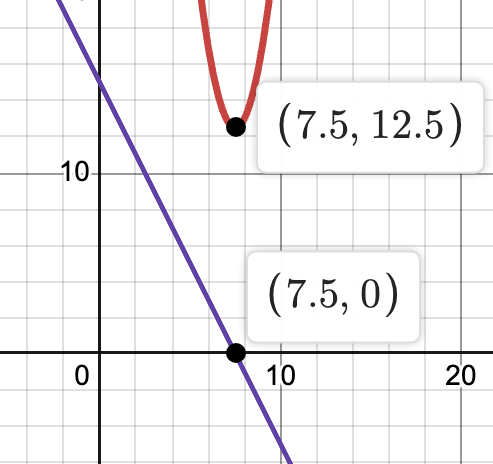

If we use barch gradient descent starting from $b = 10$ and a learning rate $\mu = 0.1$ then the next optimal value for b will be given by:

$$
\Large 15 - 2b= \\
\Large 15 -  2 * 10 = -5\\
\Large 15 - 2 * 10 * 0.1 = 13 \\ $$

In [23]:
## Classification

For two classes we do logistic regression using dummy variables. However this doesn't work for multiclass problems hence we use one-hot encoding: for classes $$\large Y^{(i)} \in \{(1,0,0), (0,1,0), (0,0,1)\}$$

We use the softmax function to force the probability value for the classes to be between 0 and 1: 
$$\Large p = \frac{e^{f(x)}}{\sum_l e^{f_l(x)}}$$